In [1]:
#instal libraries

#pip install sentence-transformers
#pip install umap-learn
#pip install hdbscan

In [1]:
#import libraries

import re
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#reads in california constitution

#i need to clean the data more

with open('../DATA/2009.txt', 'r') as f:
    data = f.read()

In [3]:
data

'MOVIEPEDIA\nRecently, we\'ve done several changes to help out this wiki, from deleting empty pages, improving the navigation, adding a rules page, as well as merging film infoboxes.\nYou can check out the latest overhauls that we have done on this wiki so far, as well as upcoming updates in our announcement post here.\nMoviepedia\n* EXPLORE\n* UPCOMING FILMS\n* IN THEATERS\n* ALL-TIME GREATS\n* COMMUNITY\n FANDOM\nFAN CENTRALBETA\nGAMES\nANIME\nMOVIES\nTV\nVIDEO\nWIKIS\nSTART A WIKI\nADVERTISEMENT\nSIGN INREGISTER\n Moviepedia \n\nFandom\'s centric resource about film knowledge\n29,087\nPAGES\n* EXPLORE\n* UPCOMING FILMS\n* IN THEATERS\n* ALL-TIME GREATS\n* COMMUNITY\nin: 20th Century Fox Transcripts, Transcripts\nAlvin and the Chipmunks: The Squeakquel/Transcript\n< Alvin and the Chipmunks: The Squeakquel\nSIGN IN TO EDIT\n(ALVIN LAUGHING)\nALVIN: We\'re back!\n(YOU REALLY GOT ME PLAYING)\n(CROWD CLAPPING RHYTHMICALLY)\nALVIN: Let\'s go!\n(FEMALE FANS SHOUTING)\n(CHIPMUNKS SINGING\nY

In [4]:
#data cleaning

def clean(text):
    pattern = r"\b(?=[MDCLXVIΙ])M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})([IΙ]X|[IΙ]V|V?[IΙ]{0,3})\b\.?"
    return re.sub(pattern, ' ', text)

data = clean(data)
data = data.replace('SEC.', ' ')

In [5]:
#Removes all numbers
data = ''.join([i for i in data if not i.isdigit()])

In [6]:
data = data.split("\n")    

In [7]:
data = [item for item in data if item != '']

In [8]:
data

[' MOVIEPEDIA',
 "Recently, we've done several changes to help out this wiki, from deleting empty pages, improving the navigation, adding a rules page, as well as merging film infoboxes.",
 'You can check out the latest overhauls that we have done on this wiki so far, as well as upcoming updates in our announcement post here.',
 ' Moviepedia',
 '* EXPLORE',
 '* UPCOMING FILMS',
 '*  IN THEATERS',
 '* ALL-TIME GREATS',
 '*  COMMUNITY',
 ' FANDOM',
 'FAN  CENTRALBETA',
 'GAMES',
 'ANIME',
 ' MOVIES',
 'TV',
 ' VIDEO',
 'WIKIS',
 'START A WIKI',
 'ADVERTISEMENT',
 'SIGN  INREGISTER',
 '  Moviepedia ',
 "Fandom's centric resource about film knowledge",
 ',',
 'PAGES',
 '* EXPLORE',
 '* UPCOMING FILMS',
 '*  IN THEATERS',
 '* ALL-TIME GREATS',
 '*  COMMUNITY',
 'in: th  Century Fox Transcripts, Transcripts',
 'Alvin and the  Chipmunks: The Squeakquel/Transcript',
 '< Alvin and the  Chipmunks: The Squeakquel',
 'SIGN  IN TO EDIT',
 '(ALVIN  LAUGHING)',
 "ALVIN: We're back!",
 '(YOU REALLY GO

In [9]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar = True)

Batches:   0%|          | 0/997 [00:00<?, ?it/s]

In [10]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

In [11]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean', 
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Avoid using `tokenizers` before the fork if possible
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
To disable this warning, you can either:
huggingface/tokenizers: The current process just got forked, after parallelism has a

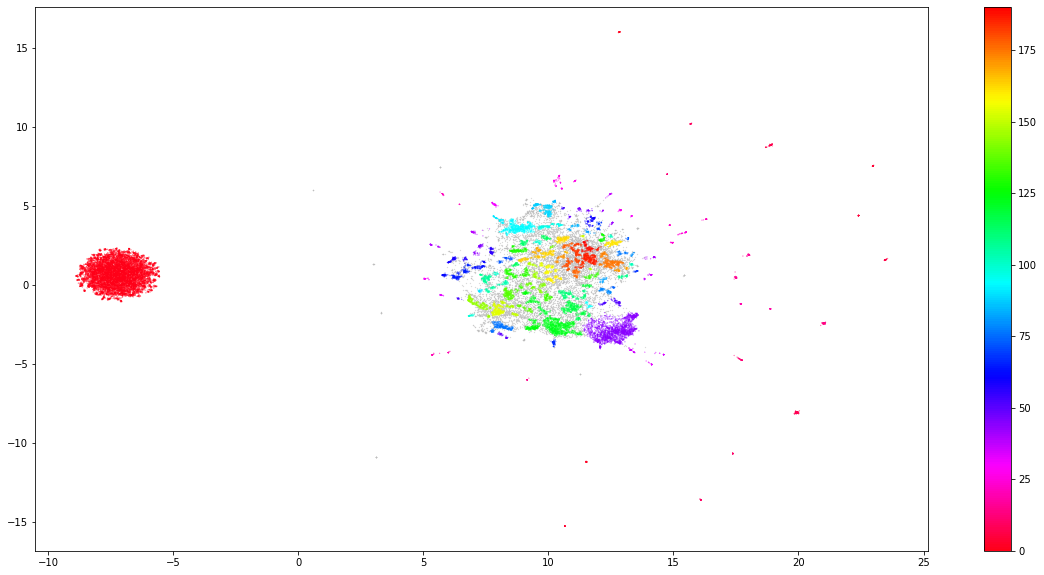

In [12]:
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x','y'])
result['labels'] = cluster.labels_

fig, ax = plt.subplots(figsize=(20,10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color = '#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [13]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [14]:
docs_per_topic

,Topic,Doc
0,-1,"MOVIEPEDIA Recently, we've done several chang..."
1,0,...
2,1,’m going to Selfridge. SELFRIDGE SELFRIDGE SE...
3,2,take us onto the bridge [Bridge] [Bridge] [Kel...
4,3,What? What? What? What? What? What? What? What...
...,...,...
187,186,SIGN IN TO EDIT You gotta share the spotlight...
188,187,This should that will take effect in that wo...
189,188,'m putting you in charge. we should do. named...
190,189,want it! got it! got it! .. - Looks li...


In [15]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [16]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

/var/folders/sx/mxg316554p53ftfz37jrsvnr0000gn/T/ipykernel_10784/3267578824.py:5: RuntimeWarning: invalid value encountered in true_divide
  tf = np.divide(t.T, w)


In [17]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(15)

,Topic,Size
1,0,9110
0,-1,8146
45,44,1918
123,122,966
94,93,646
187,186,350
118,117,314
176,175,301
145,144,278
155,154,250


In [18]:
len(top_n_words)

192

In [20]:
index = [0,44,122,93,186,117,175,144,154]

In [21]:
for i in index:
    print("Topic #", i-1)
    print(top_n_words[i][:7])
    print()

Topic # -1
[('event', 9.270964993792617), ('моё', 0.0), ('flattened', 0.0), ('fleeting', 0.0), ('fleet', 0.0), ('flee', 0.0), ('fled', 0.0)]

Topic # 43
[('don', 0.39428293257135166), ('know', 0.09758273899262634), ('didn', 0.09374018926335827), ('won', 0.06882186465483656), ('gonna', 0.047340306082532854), ('think', 0.046282476346392355), ('just', 0.04448998123521039)]

Topic # 121
[('bad', 0.10170552291761108), ('shit', 0.073217067718267), ('fuck', 0.07126935718383041), ('hurt', 0.06149560085188325), ('like', 0.05654084080280633), ('wrong', 0.055638876961227705), ('really', 0.05301282033356038)]

Topic # 92
[('good', 0.3540617248208402), ('love', 0.18683621843615617), ('great', 0.1231884252229576), ('nice', 0.10122441623401883), ('fun', 0.08198627475402455), ('awesome', 0.07813391834386459), ('beautiful', 0.07545323110886824)]

Topic # 185
[('need', 0.25406431181368555), ('check', 0.16860179220665952), ('help', 0.16764403274538203), ('just', 0.13172501493634453), ('want', 0.128709535